# Navigating information seas with data science <BR> BBC news classification

## Introduction

In the fast paced and ever evolving landscape of news dissemination, accurate categorization and timely access to information play pivotal roles in fostering an informed global community. This project, titled "BBC News Classification," delves into the realm of machine learning to address the challenge of classifying news articles from the renowned British Broadcasting Corporation (BBC) into distinct categories. By employing cutting-edge techniques, this classification system aims to enhance the efficiency of news organization, facilitating users in navigating through diverse topics with ease. Through the fusion of technology and journalism, the project endeavors to contribute to a more streamlined and accessible news consumption experience in our interconnected world.

## Data fields
* ArticleId - Article id unique # given to the record
* Article - text of the header and article
* Category - cateogry of the article (tech, business, sport, entertainment, politics/li>

## Import Library

In [1]:
import numpy as np
import pandas as pd

## Load Datasets

In [2]:
train = pd.read_csv('BBC News Train.csv')

## Explaratory Data Analysis

In [3]:
import ydata_profiling
from pandas_profiling import ProfileReport

report = ProfileReport
report(train)

/var/folders/25/py38ks495xd785syg74nqh1h0000gn/T/ipykernel_6207/2344277200.py:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In the dataset, there are a total of 2 categorical variables and 1 numeric variables. There a re no missing values and there are no duplicate rows in the dataset.

Based on the graph, sports news has the highest value at 23.2%, followed by business, politics, entertainment, and technology.

In [4]:
train['Category'].value_counts()

Category
sport            346
business         336
politics         274
entertainment    273
tech             261
Name: count, dtype: int64

In [5]:
train.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [6]:
train['Text'].head()

0    worldcom ex-boss launches defence lawyers defe...
1    german business confidence slides german busin...
2    bbc poll indicates economic gloom citizens in ...
3    lifestyle  governs mobile choice  faster  bett...
4    enron bosses in $168m payout eighteen former e...
Name: Text, dtype: object

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.0+ KB


In [8]:
train.duplicated().sum()

0

In the dataset there are no missing values and duplicate data

## Data Preprocessing

The preprocessing flow for this model is as follows: : <br>
text cleaning -> Tokenization -> Stop Words -> Lemmatization -> Vectorizing 
    

## Text Cleaning

Text cleaning is the initial step in preprocessing, involving the removal of unwanted elements such as HTML tags, punctuation, and other non-essential characters. This ensures that the text data is in a consistent and usable format.

In [9]:
train['message_len'] = train.Text.apply(len)
train.head(10)

,ArticleId,Text,Category,message_len
0,1833,worldcom ex-boss launches defence lawyers defe...,business,1866
1,154,german business confidence slides german busin...,business,2016
2,1101,bbc poll indicates economic gloom citizens in ...,business,3104
3,1976,lifestyle governs mobile choice faster bett...,tech,3618
4,917,enron bosses in $168m payout eighteen former e...,business,2190
5,1582,howard truanted to play snooker conservative...,politics,1588
6,651,wales silent on grand slam talk rhys williams ...,sport,1988
7,1797,french honour for director parker british film...,entertainment,1342
8,2034,car giant hit by mercedes slump a slump in pro...,business,2609
9,1866,fockers fuel festive film chart comedy meet th...,entertainment,1368


In [10]:
# Text Cleaning
import re
import nltk
def Clean(Text):
    sms = re.sub('[^a-zA-Z]', ' ', Text)
    sms = sms.lower()
    sms = sms.split()
    sms = ' '.join(sms)
    return sms

train["Clean_Text"] = train["Text"].apply(Clean)
print("The First 10 Texts after cleaning: ",*train["Clean_Text"][:10], sep = "\n")

The First 10 Texts after cleaning: 
worldcom ex boss launches defence lawyers defending former worldcom chief bernie ebbers against a battery of fraud charges have called a company whistleblower as their first witness cynthia cooper worldcom s ex head of internal accounting alerted directors to irregular accounting practices at the us telecoms giant in her warnings led to the collapse of the firm following the discovery of an bn bn accounting fraud mr ebbers has pleaded not guilty to charges of fraud and conspiracy prosecution lawyers have argued that mr ebbers orchestrated a series of accounting tricks at worldcom ordering employees to hide expenses and inflate revenues to meet wall street earnings estimates but ms cooper who now runs her own consulting business told a jury in new york on wednesday that external auditors arthur andersen had approved worldcom s accounting in early and she said andersen had given a green light to the procedures and practices used by worldcom mr ebber s 

## Tokenization

Tokenization is the process of breaking down the cleaned text into individual units, usually words or phrases. Each unit, or token, represents a discrete element of the text and serves as the fundamental building block for subsequent analysis.

In [11]:
# Tokenization
train["Tokenize_Text"]=train.apply(lambda row: nltk.word_tokenize(row["Clean_Text"]), axis=1)
train.head(10)

,ArticleId,Text,Category,message_len,Clean_Text,Tokenize_Text
0,1833,worldcom ex-boss launches defence lawyers defe...,business,1866,worldcom ex boss launches defence lawyers defe...,"[worldcom, ex, boss, launches, defence, lawyer..."
1,154,german business confidence slides german busin...,business,2016,german business confidence slides german busin...,"[german, business, confidence, slides, german,..."
2,1101,bbc poll indicates economic gloom citizens in ...,business,3104,bbc poll indicates economic gloom citizens in ...,"[bbc, poll, indicates, economic, gloom, citize..."
3,1976,lifestyle governs mobile choice faster bett...,tech,3618,lifestyle governs mobile choice faster better ...,"[lifestyle, governs, mobile, choice, faster, b..."
4,917,enron bosses in $168m payout eighteen former e...,business,2190,enron bosses in m payout eighteen former enron...,"[enron, bosses, in, m, payout, eighteen, forme..."
5,1582,howard truanted to play snooker conservative...,politics,1588,howard truanted to play snooker conservative l...,"[howard, truanted, to, play, snooker, conserva..."
6,651,wales silent on grand slam talk rhys williams ...,sport,1988,wales silent on grand slam talk rhys williams ...,"[wales, silent, on, grand, slam, talk, rhys, w..."
7,1797,french honour for director parker british film...,entertainment,1342,french honour for director parker british film...,"[french, honour, for, director, parker, britis..."
8,2034,car giant hit by mercedes slump a slump in pro...,business,2609,car giant hit by mercedes slump a slump in pro...,"[car, giant, hit, by, mercedes, slump, a, slum..."
9,1866,fockers fuel festive film chart comedy meet th...,entertainment,1368,fockers fuel festive film chart comedy meet th...,"[fockers, fuel, festive, film, chart, comedy, ..."


## Stop Word Removal

Stop words are common words (e.g., "the," "and," "is") that do not carry significant meaning and can be safely excluded from the analysis to improve efficiency. Removing stop words helps focus on the more meaningful content of the text.

In [12]:
from nltk.corpus import stopwords

In [13]:
# Stop Words
def remove_stopwords(text):
    stop_words = set(stopwords.words("english"))
    filtered_text = [word for word in text if word not in stop_words]
    return filtered_text

train["Nostopword_Text"] = train["Tokenize_Text"].apply(remove_stopwords)

print("The First 10 Texts after removing the stopwords:",*train["Nostopword_Text"][:10], sep = "\n")

The First 10 Texts after removing the stopwords:
['worldcom', 'ex', 'boss', 'launches', 'defence', 'lawyers', 'defending', 'former', 'worldcom', 'chief', 'bernie', 'ebbers', 'battery', 'fraud', 'charges', 'called', 'company', 'whistleblower', 'first', 'witness', 'cynthia', 'cooper', 'worldcom', 'ex', 'head', 'internal', 'accounting', 'alerted', 'directors', 'irregular', 'accounting', 'practices', 'us', 'telecoms', 'giant', 'warnings', 'led', 'collapse', 'firm', 'following', 'discovery', 'bn', 'bn', 'accounting', 'fraud', 'mr', 'ebbers', 'pleaded', 'guilty', 'charges', 'fraud', 'conspiracy', 'prosecution', 'lawyers', 'argued', 'mr', 'ebbers', 'orchestrated', 'series', 'accounting', 'tricks', 'worldcom', 'ordering', 'employees', 'hide', 'expenses', 'inflate', 'revenues', 'meet', 'wall', 'street', 'earnings', 'estimates', 'ms', 'cooper', 'runs', 'consulting', 'business', 'told', 'jury', 'new', 'york', 'wednesday', 'external', 'auditors', 'arthur', 'andersen', 'approved', 'worldcom', 'acco

In [14]:
train.head()

,ArticleId,Text,Category,message_len,Clean_Text,Tokenize_Text,Nostopword_Text
0,1833,worldcom ex-boss launches defence lawyers defe...,business,1866,worldcom ex boss launches defence lawyers defe...,"[worldcom, ex, boss, launches, defence, lawyer...","[worldcom, ex, boss, launches, defence, lawyer..."
1,154,german business confidence slides german busin...,business,2016,german business confidence slides german busin...,"[german, business, confidence, slides, german,...","[german, business, confidence, slides, german,..."
2,1101,bbc poll indicates economic gloom citizens in ...,business,3104,bbc poll indicates economic gloom citizens in ...,"[bbc, poll, indicates, economic, gloom, citize...","[bbc, poll, indicates, economic, gloom, citize..."
3,1976,lifestyle governs mobile choice faster bett...,tech,3618,lifestyle governs mobile choice faster better ...,"[lifestyle, governs, mobile, choice, faster, b...","[lifestyle, governs, mobile, choice, faster, b..."
4,917,enron bosses in $168m payout eighteen former e...,business,2190,enron bosses in m payout eighteen former enron...,"[enron, bosses, in, m, payout, eighteen, forme...","[enron, bosses, payout, eighteen, former, enro..."


## Lemmatization

Lemmatization involves reducing words to their base or root form. This step is essential for standardizing words and ensuring that different grammatical forms of the same word are treated as identical.

In [15]:
# Lemmatization 
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
def lemmatize_word(text):
    lemmas = [lemmatizer.lemmatize(word, pos ='v') for word in text]
    return lemmas

train["Lemmatized_Text"] = train["Nostopword_Text"].apply(lemmatize_word)
print("The First 10 Texts after lemmatization:",*train["Lemmatized_Text"][:10], sep = "\n")

The First 10 Texts after lemmatization:
['worldcom', 'ex', 'boss', 'launch', 'defence', 'lawyers', 'defend', 'former', 'worldcom', 'chief', 'bernie', 'ebbers', 'battery', 'fraud', 'charge', 'call', 'company', 'whistleblower', 'first', 'witness', 'cynthia', 'cooper', 'worldcom', 'ex', 'head', 'internal', 'account', 'alert', 'directors', 'irregular', 'account', 'practice', 'us', 'telecoms', 'giant', 'warn', 'lead', 'collapse', 'firm', 'follow', 'discovery', 'bn', 'bn', 'account', 'fraud', 'mr', 'ebbers', 'plead', 'guilty', 'charge', 'fraud', 'conspiracy', 'prosecution', 'lawyers', 'argue', 'mr', 'ebbers', 'orchestrate', 'series', 'account', 'trick', 'worldcom', 'order', 'employees', 'hide', 'expense', 'inflate', 'revenues', 'meet', 'wall', 'street', 'earn', 'estimate', 'ms', 'cooper', 'run', 'consult', 'business', 'tell', 'jury', 'new', 'york', 'wednesday', 'external', 'auditors', 'arthur', 'andersen', 'approve', 'worldcom', 'account', 'early', 'say', 'andersen', 'give', 'green', 'light'

In [16]:
train["Lemmatized_Text"]

0       [worldcom, ex, boss, launch, defence, lawyers,...
1       [german, business, confidence, slide, german, ...
2       [bbc, poll, indicate, economic, gloom, citizen...
3       [lifestyle, govern, mobile, choice, faster, be...
4       [enron, boss, payout, eighteen, former, enron,...
                              ...                        
1485    [double, eviction, big, brother, model, capric...
1486    [dj, double, act, revamp, chart, show, dj, duo...
1487    [weak, dollar, hit, reuters, revenues, media, ...
1488    [apple, ipod, family, expand, market, apple, e...
1489    [santy, worm, make, unwelcome, visit, thousand...
Name: Lemmatized_Text, Length: 1490, dtype: object

In [17]:
corpus= []
for i in train["Lemmatized_Text"]:
    msg = ' '.join([row for row in i])
    corpus.append(msg)

corpus[:5]
print("The First 10 lines in corpus :",*corpus[:10], sep = "\n")

The First 10 lines in corpus :
worldcom ex boss launch defence lawyers defend former worldcom chief bernie ebbers battery fraud charge call company whistleblower first witness cynthia cooper worldcom ex head internal account alert directors irregular account practice us telecoms giant warn lead collapse firm follow discovery bn bn account fraud mr ebbers plead guilty charge fraud conspiracy prosecution lawyers argue mr ebbers orchestrate series account trick worldcom order employees hide expense inflate revenues meet wall street earn estimate ms cooper run consult business tell jury new york wednesday external auditors arthur andersen approve worldcom account early say andersen give green light procedures practice use worldcom mr ebber lawyers say unaware fraud argue auditors alert problems ms cooper also say shareholder meet mr ebbers often pass technical question company finance chief give brief answer prosecution star witness former worldcom financial chief scott sullivan say mr ebb

## Vectorizing

Vectorizing is the process of converting the preprocessed text into numerical vectors that machine learning algorithms can understand. Methods used TF-IDF (Term Frequency-Inverse Document Frequency) or word embeddings. This transformation allows the algorithm to operate on the data effectively and identify patterns or relationships within the text.

In [18]:
# Vectorizing Text
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
X = tfidf.fit_transform(corpus).toarray()

X.dtype

dtype('float64')

In [19]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [20]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train["Category"] = label_encoder.fit_transform(train["Category"])

In [21]:
train["Category"].value_counts()

Category
3    346
0    336
2    274
1    273
4    261
Name: count, dtype: int64

In [22]:
train.head()

,ArticleId,Text,Category,message_len,Clean_Text,Tokenize_Text,Nostopword_Text,Lemmatized_Text
0,1833,worldcom ex-boss launches defence lawyers defe...,0,1866,worldcom ex boss launches defence lawyers defe...,"[worldcom, ex, boss, launches, defence, lawyer...","[worldcom, ex, boss, launches, defence, lawyer...","[worldcom, ex, boss, launch, defence, lawyers,..."
1,154,german business confidence slides german busin...,0,2016,german business confidence slides german busin...,"[german, business, confidence, slides, german,...","[german, business, confidence, slides, german,...","[german, business, confidence, slide, german, ..."
2,1101,bbc poll indicates economic gloom citizens in ...,0,3104,bbc poll indicates economic gloom citizens in ...,"[bbc, poll, indicates, economic, gloom, citize...","[bbc, poll, indicates, economic, gloom, citize...","[bbc, poll, indicate, economic, gloom, citizen..."
3,1976,lifestyle governs mobile choice faster bett...,4,3618,lifestyle governs mobile choice faster better ...,"[lifestyle, governs, mobile, choice, faster, b...","[lifestyle, governs, mobile, choice, faster, b...","[lifestyle, govern, mobile, choice, faster, be..."
4,917,enron bosses in $168m payout eighteen former e...,0,2190,enron bosses in m payout eighteen former enron...,"[enron, bosses, in, m, payout, eighteen, forme...","[enron, bosses, payout, eighteen, former, enro...","[enron, boss, payout, eighteen, former, enron,..."


In [23]:
from sklearn.model_selection import train_test_split

y = train["Category"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Modelling

In [24]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(C=5.0, dual=False, penalty='l2')
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

This research employs Logistic Regression with a moderate regularization strength (C=5.0) to prevent overfitting. The choice of non-dual formulation (dual=False) indicates the utilization of the primal formulation in solving the optimization problem. Additionally, L2 regularization (penalty='l2') is applied to help prevent overfitting, especially beneficial when working with a large number of features.

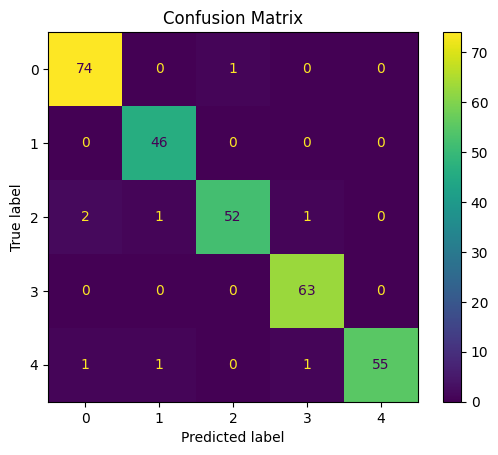

In [25]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
%matplotlib inline

cm = confusion_matrix(y_test, y_pred)

#
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot(cmap='viridis')  

plt.title('Confusion Matrix')
plt.show()


### Category :
* 0 = business
* 1 = entertainment
* 2 = politics
* 3 = sport
* 4 = tech

    

## Result

In [26]:
from sklearn import metrics

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        75
           1       0.96      1.00      0.98        46
           2       0.98      0.93      0.95        56
           3       0.97      1.00      0.98        63
           4       1.00      0.95      0.97        58

    accuracy                           0.97       298
   macro avg       0.97      0.97      0.97       298
weighted avg       0.97      0.97      0.97       298



* Precision : This metric measures how many of the predicted positive instances were actually positive. Average precission for class 0 - 4 around 0.97.
* Recall : Indicates how many of the actual positive instances were correctly predicted. Average Recall for class 0 - 4 around 0.97.
* F1-score : The harmonic mean of precision and recall. It balances both metrics. Average F1-score for class 0 - 4 around 0.97.
* Support : represents the number of instances in each class. For class 0, there are 75 instances, and for class 1, there are 46 instances, etc
* Accuracy : The overall accuracy of the model is not explicitly shown in this table.
* Macro Average : The average of precision, recall, and F1-score across both classes.
* Weighted Average : considers the number of instances in each class when calculating the average.


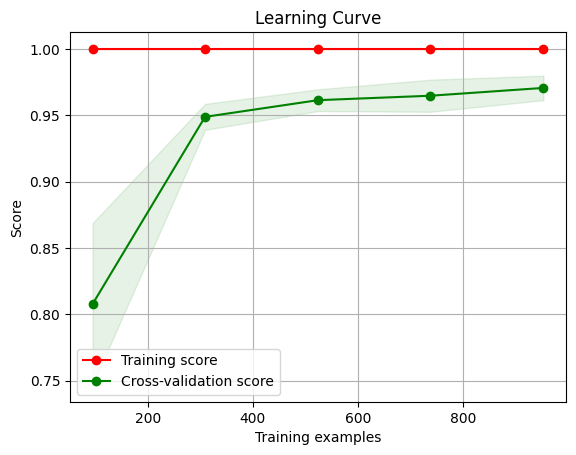

In [27]:

from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


plot_learning_curve(classifier, "Learning Curve", X_train, y_train, cv=5)
plt.show()


Based on the results of interpreting the confusion matrix, it can be concluded that the classification model used has good performance. This model is able to predict positive data with high precision, and is also able to predict negative data with high recall.

As the number of training samples increases, both the training and test scores exhibit a consistent upward trend, as illustrated in the graph. This suggests that the machine learning model is capable of generalizing effectively to test data without experiencing overfitting to the training data.